In [12]:
import pandas as pd

In [13]:
prachathai = pd.read_csv('prachathai-67k.csv')
print(prachathai.shape)
prachathai.head()

(67889, 5)


,url,date,title,body_text,labels
0,https://prachatai.com/print/42,2004-08-24 14:31,"นักวิจัยหนุน ""แม้ว"" เปิด ""จีเอ็มโอ""",ประชาไท --- 23 ส.ค.2547 นักวิจัยฯ ชี้นโยบายจี...,"['ข่าว', 'สิ่งแวดล้อม']"
1,https://prachatai.com/print/41,2004-08-24 14:22,ภาคประชาชนต้านเปิดเสรีจีเอ็มโอ,ประชาไท- 23 ส.ค.2547 นักวิชาการ ภาคประชาชน จ...,"['ข่าว', 'สิ่งแวดล้อม']"
2,https://prachatai.com/print/43,2004-08-24 15:17,จุฬาฯ ห่วงจีเอ็มโอลามข้าวไทย,นโยบายที่อนุญาตให้ปลูกร่วมกับพืชอื่นได้นั้นถื...,"['ข่าว', 'สิ่งแวดล้อม']"
3,https://prachatai.com/print/45,2004-08-24 15:58,ฟองสบู่การเมืองแตก ทักษิณหมดกึ๋น ชนชั้นกลางหมด...,ประชาไท -- 23 ส.ค. 47 ขาประจำทักษิณ ฟันธง ฟอง...,"['ข่าว', 'การเมือง', 'คณะเศรษฐศาสตร์ มหาวิทยาล..."
4,https://prachatai.com/print/47,2004-08-24 16:10,กอต.เสนอเลิกถนนคลองลาน-อุ้มผาง,ประชาไท-23 ส.ค.47 คณะกรรมการอนุรักษ์ ผืนป่าตะ...,"['ข่าว', 'สิ่งแวดล้อม']"


In [14]:
from pythainlp.tokenize import word_tokenize

In [16]:
len(prachathai['body_text'].tolist())

67889

In [26]:
sentences = [word_tokenize(text, engine='newmm') for text in prachathai[:2000]['body_text'].tolist()]

In [27]:
sentences[20]

[' ',
 '"',
 'นคร',
 ' ',
 'ชม',
 'ภู',
 'ชาติ',
 ' ',
 'จาก',
 'สภา',
 'ทนายความ',
 ' ',
 'ใน',
 'ฐานะ',
 'ทนายความ',
 'ของ',
 'น.ส.',
 'สุ',
 'ภิญญา',
 '  ',
 'กลาง',
 'ณรงค์',
 '"',
 '    ',
 '\n',
 'คดี',
 'ที่',
 'ฟ้อง',
 'ทาง',
 'แพ่ง',
 'ครั้งนี้',
 'มี',
 'เนื้อ',
 'ความเหมือน',
 'คดีอาญา',
 'ที่',
 'เคย',
 'ถูก',
 'ฟ้อง',
 'มา',
 'แล้ว',
 'ก่อนหน้านี้',
 'แต่',
 'เป็นการ',
 'เรียกค่าเสียหาย',
 'เพิ่มเติม',
 'โดย',
 'โจทก์',
 'ระบุ',
 'สาเหตุ',
 'ของ',
 'ความเสียหาย',
 'ว่า',
 'มาจาก',
 ' ',
 '4',
 ' ',
 'ข้อ',
 ' ',
 'ข้อ',
 'ละ',
 ' ',
 '100',
 ' ',
 'ล้าน',
 'บาท',
 ' ',
 'คือ',
 '    ',
 '\n',
 '1',
 '.',
 'ทำให้',
 'โจทก์',
 'ซึ่ง',
 'ประกอบ',
 'กิจการ',
 'โดยเฉพาะ',
 'โทรคมนาคม',
 'ที่',
 'มีชื่อเสียง',
 'มาโดยตลอด',
 'ต้อง',
 'ได้รับ',
 'ความเสียหาย',
 ' ',
 'เสียชื่อเสียง',
 ' ',
 'เกียรติคุณ',
 '     ',
 '\n',
 '2',
 '.',
 'จำเลย',
 'ทำให้',
 'โจทก์',
 'เสียหาย',
 'ใน',
 'ทาง',
 'ทำ',
 'กิน',
 ' ',
 'รวมทั้ง',
 'ทาง',
 'เจริญเติบโต',
 'ของ',
 'ธุรกิจ',
 ' ',
 'ที่',
 '

In [28]:
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [30]:
print(sentences[0:2])

[['ประชา', 'ไท', ' ', '---', ' ', '23', ' ', 'ส.ค.', '2547', '  ', 'นักวิจัย', 'ฯ', ' ', 'ชี้', 'นโยบาย', 'จีเอ็มโอ', 'เอื้อ', 'ต่อ', 'การค้นคว้าวิจัย', ' ', 'แต่', 'ไม่', 'ใช่', 'คำตอบ', 'ทั้งหมด', ' ', 'ขณะที่', 'ผอ.', 'สวทช.', 'ระบุ', 'มาตรการ', 'ตรวจสอบ', 'ความปลอดภัย', 'มี', 'มา', 'ก่อน', 'การ', 'กำหนด', 'นโยบาย', 'ของ', 'รัฐบาล', ' ', 'เพียงแต่', 'ทบทวน', 'และ', 'ปรับปรุง', 'เพิ่มเติม', '  ', '\n', 'สำนักงาน', 'พัฒนา', 'วิทยาศาสตร์', 'และ', 'เทคโนโลยี', '  ', 'จัด', 'สัมมนา', 'เกี่ยวกับ', 'มะละกอ', 'ดัดแปลง', 'พันธุกรรม', 'ในประเทศ', 'ไทย', ' ', 'มี', 'นักวิชาการ', ' ', 'นักวิจัย', 'จาก', 'กรมวิชาการเกษตร', '  ', 'มหาวิทยาลัยเกษตรศาสตร์', '  ', 'และ', 'มหาวิทยาลัยมหิดล', 'เข้าร่วม', '  ', 'โดย', 'มี', 'การ', 'นำเสนอ', 'ผลการศึกษา', 'ทดลอง', 'ที่ผ่านมา', '  ', 'ซึ่ง', 'พบ', 'ว่า', 'มะละกอ', '\n', 'จีเอ็มโอ', 'ผ่านการทดสอบ', 'ความปลอดภัย', 'ทาง', 'ชีวภาพ', 'สิ่งแวดล้อม', 'และ', 'อาหาร', 'ระดับ', 'หนึ่ง', 'เท่านั้น', '    ', '\n', ' ', '"', 'การค้นคว้าวิจัย', 'มะละกอ', 'จีเอ็มโอ', '

In [31]:
num_workers = 2
downsampling = 1e-3
num_feature = 100
min_word_count = 10
context = 8
modelname = 'word2vec_gensim'

In [46]:
w2v = word2vec.Word2Vec(workers=num_workers, max_vocab_size=None, vector_size=num_feature, min_count=min_word_count, window=context, sample=downsampling)

In [47]:
w2v.build_vocab(sentences)

In [48]:
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=10)

(8329118, 11963870)

In [49]:
WORD = "รถ"
w2v.wv.most_similar(WORD, topn=20)

[('คัน', 0.880924642086029),
 ('จอด', 0.8617746233940125),
 ('วิ่ง', 0.8312888741493225),
 ('รถบรรทุก', 0.823367178440094),
 ('นอน', 0.8218986988067627),
 ('รถกระบะ', 0.8104279637336731),
 ('ขึ้นรถ', 0.8035823702812195),
 ('ล้อ', 0.792911946773529),
 ('ขี่', 0.7788247466087341),
 ('โรงพัก', 0.7724006175994873),
 ('พัก', 0.7682336568832397),
 ('ใส่', 0.7677119374275208),
 ('รถจักรยานยนต์', 0.7676965594291687),
 ('ขับรถ', 0.7666316628456116),
 ('นั่ง', 0.7659447193145752),
 ('ทับกัน', 0.7642862796783447),
 ('ขับ', 0.7628204226493835),
 ('ท้อง', 0.7579960823059082),
 ('รถยนต์', 0.7371087074279785),
 ('ข้าง', 0.7333202362060547)]

In [50]:
WORD = "เมื่อไหร่"
w2v.wv.most_similar(WORD, topn=20)

[('ยังไง', 0.7518206834793091),
 ('มั้ย', 0.7148282527923584),
 ('ทุกครั้ง', 0.7049916386604309),
 ('เมื่อใด', 0.7004212141036987),
 ('ไม่งั้น', 0.693626344203949),
 ('ฉัน', 0.6834286451339722),
 ('นึก', 0.6832706332206726),
 ('กลัว', 0.6807498931884766),
 ('ค่อนข้างจะ', 0.6780810356140137),
 ('แค่นั้น', 0.6735287308692932),
 ('เดี๋ยว', 0.6681802868843079),
 ('เจ้าของบ้าน', 0.6671634912490845),
 ('พอแล้ว', 0.6658304333686829),
 ('จริงๆ', 0.6566267609596252),
 ('ตอนนั้น', 0.6559668183326721),
 ('ไง', 0.6441969275474548),
 ('ดูเหมือน', 0.64166659116745),
 ('เมื่อไร', 0.6402873396873474),
 ('เดี๋ยวนี้', 0.6391369700431824),
 ('อด', 0.6321067810058594)]

In [51]:
WORD = "ทักษิณ"
w2v.wv.most_similar(WORD, topn=20)

[('พ.ต.ท.', 0.8918789625167847),
 ('ชินวัตร', 0.8834579586982727),
 ('นายกรัฐมนตรี', 0.7196049690246582),
 ('ผู้นำประเทศ', 0.6306033134460449),
 ('นายกฯ', 0.6024326086044312),
 ('ฯพณฯ', 0.5992477536201477),
 ('ระบอบ', 0.594645082950592),
 ('ดำริ', 0.5642423629760742),
 ('หาเสียง', 0.521698534488678),
 ('พายัพ', 0.5196114182472229),
 ('หุ้น', 0.5054323077201843),
 ('แข็งกร้าว', 0.4959358870983124),
 ('ซุก', 0.49239328503608704),
 ('หลีก', 0.48443928360939026),
 ('เสียงข้างมาก', 0.46982842683792114),
 ('ขอโทษ', 0.469072163105011),
 ('รัฐบาล', 0.4647895097732544),
 ('พรรคประชาธิปัตย์', 0.4619766175746918),
 ('เปิดผนึก', 0.4472459554672241),
 ('ท่าที', 0.44548389315605164)]

In [52]:
word = "นักข่าว"
he = w2v.wv.most_similar(word, topn=20)

In [53]:
x = [w[0] for w in he]
x.append(word)

In [58]:
labels = w2v.wv.index_to_key

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)
thai2plot = tsne.fit_transform(w2v.wv.vectors)

c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [61]:
sample_idx = []
for word in x:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]

In [62]:
def plot_with_labels(low_dim_embs, labels, filename, figsize=(10, 10)):
    assert low_dim_embs.shape[0] >= len(labels)
    plt.figure(figsize=figsize)
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = font_manager.FontProperties(fname=f'THSarabunNew.ttf', size=20)
        plt.annotate(label, fontproperties=prop, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.savefig(filename)

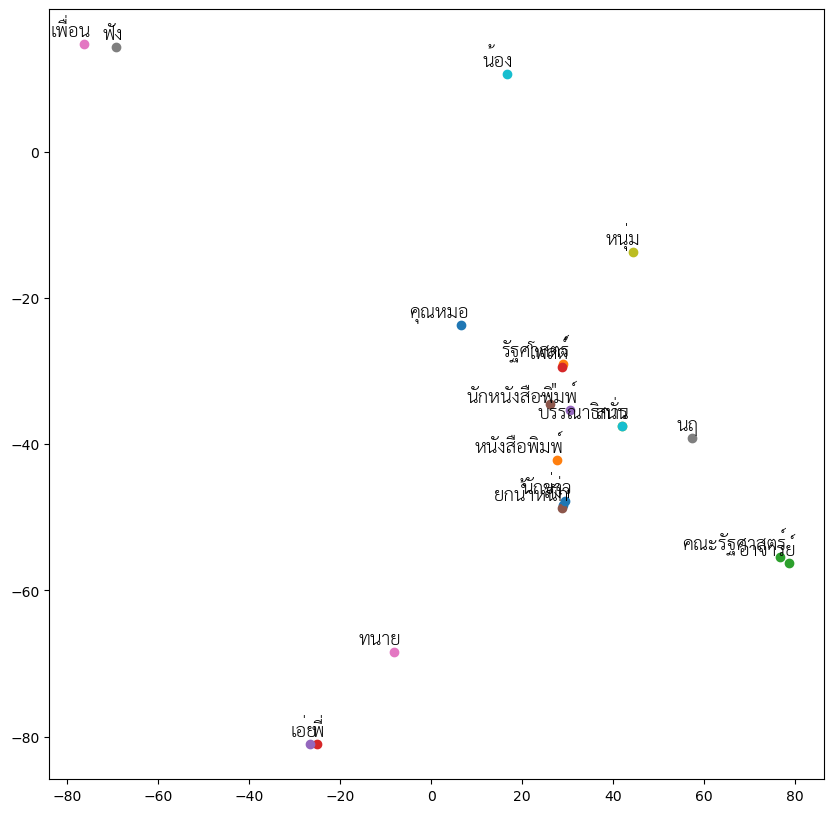

In [63]:
plot_with_labels(sample_plot, x,'cute.png' )

In [66]:
w2v.wv.similarity('นักข่าว', 'ทักษิณ')

0.0043013133

In [75]:
w2v.wv.similarity('เพื่อน', 'แฟน')

0.66575444